Data Science Lab
Pulkit Mahajan, Anuv Gupta, Jason Gu 

In [1]:
#imports Cell
import numpy
import matplotlib.pyplot as plt
import math, random
import pandas

1. Create 1000 samples from a Gaussian distribution with mean -10 and standard deviation 5. 
   Create another 1000 samples from another independent Gaussian with mean 10 and standard deviation 5.

In [2]:
# numpy.random.normal samples Gaussian Distribution
x = numpy.random.normal(-10, 5, 1000)

In [3]:
y = numpy.random.normal(10, 5, 1000)
# print(y)

In [4]:
combinArr = []
combinArr = x + y 

In [5]:
#This doesn't look right - why?
# for i in range(1000):
#     combinArr = x[i] + y[i];

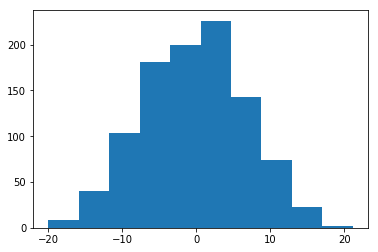

In [6]:
plt.hist(combinArr);

In [7]:
print("Mean is " + str(combinArr.mean()))
print("Variance is " + str(combinArr.var()))

Mean is -0.25147395386856647
Variance is 47.57272670435879


Let Xi be an iid Bernoulli random variable with value {-1,1}.
Look at the random variable Zn = 1/sqrt(n) SUM(Xi). By taking 1000 draws from Zn, plot its histogram. 
Check that for small n (say, 5-10) Zn does not look that much like a Gaussian, but when n is bigger 
(already by the time n = 30 or 50) it looks much more like a Gaussian. 
Check also for much bigger n: n = 250, to see that at this point, one can really see the bell curve.

In [8]:
# randomVar = []
# for i in range(1000):
#     idx = ((2/1000) * i) + -1;
#     sqrtPart=""
#     sumPart = []
#     if i == 0: 
#         sqrtPart = 0
#         sumPart.append(0)
#     else:
#         sqrtPart = 1 / math.sqrt(i)
#         sumPart.append( (sumPart[i-1] + i) * sqrtPart)

def bernoulli(sampleNum):
    #Cant put for loop outside - so what is this syntax doing?
    bVar = [(1/math.sqrt(sampleNum)) * sum([random.choice([-1,1]) for i in range(1, sampleNum+1)]) for x in range(1000) ]
    plt.hist(bVar)
    plt.show()
    return bVar

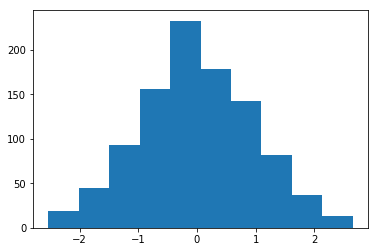

In [9]:
bVar1000 = bernoulli(1000)
# plt.hist(bVar1000)

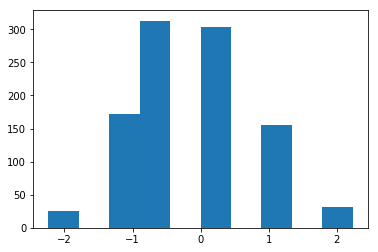

In [10]:
bVar5 = bernoulli(5)

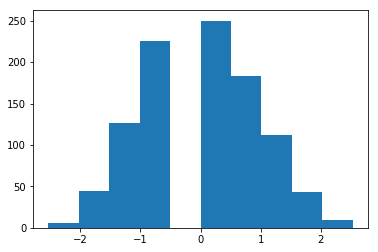

In [11]:
bVar10 = bernoulli(10)

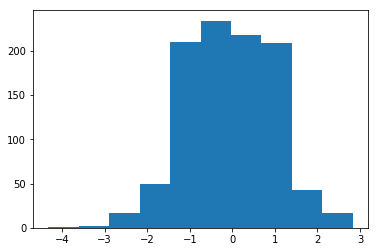

In [12]:
bVar45 = bernoulli(45)

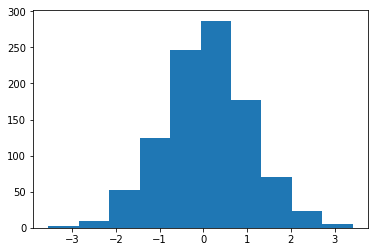

In [13]:
bVar250 = bernoulli(250)

3. Estimate the mean and standard deviation from 1 dimensional data: 
   generate 25,000 samples from a Gaussian distribution with mean 0 and standard deviation 5. 
   Then estimate the mean and standard deviation of this gaussian using elementary numpy commands, 
   i.e., addition, multiplication, division (do not use a command that takes data and returns 
   the mean or standard deviation).

In [14]:
gauss = numpy.random.normal(0, 5, 25000)

In [15]:
def myMean(arr, num):
    return sum(arr)/num

In [16]:
def myStdDev(origArr, mean, num):
    loopPart = [((curr - mean)**2) for curr in origArr]
    stdDev = math.sqrt(sum(loopPart)/num)
    return stdDev

In [17]:
#Estimate the Mean and Standard Deviation
mean = myMean(gauss, 25000)
# sum(gauss)/250000
print("Mean is: " + str(mean))
# std = sqrt(mean(abs(x - x.mean())**2)).
#loop through each point,subtract mean, and square
stdDev = myStdDev(gauss, mean, 25000)
print("Var is: " + str(stdDev))

Mean is: -0.06114548161543833
Var is: 5.001690121149467


Estimate the mean and covariance matrix for multi-dimensional data: generate 10,000 samples of 2 dimensional data from the Gaussian distribution
(Xi) = N([-5],[20 0.8])  
(Yi) &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;([ 5] [0.8 30]) 



In [18]:
#generate 10,000 samples of 2 dimensional data from the Gaussian distribution
# Use numpy.random.multivariate_normal
meanArr = [-5, 5]
covArr = [[20, .8], [.8, 30]]
x, y = numpy.random.multivariate_normal(meanArr, covArr, 10000).T

In [19]:
#x
xMean = myMean(x, 10000)
#Variance is stdDeviation^2
xVar = (myStdDev(x, xMean, 10000))**2
print("X mean is: " + str(xMean))
print("X var is: " + str(xVar))

X mean is: -4.934308150834433
X var is: 19.464558046882388


In [20]:
#y
yMean = myMean(y, 10000)
#Variance is stdDeviation^2
yVar = (myStdDev(y, yMean, 10000))**2

In [21]:
#cov
covXY = 1/(10000-1) * sum( [(xVal-xMean) * (yVal - yMean) for xVal, yVal in zip(x, y)])
print(covXY)

0.7413181625892159


Then, estimate the mean and covariance matrix for this multi-dimensional data using elemen- tary numpy commands, i.e., addition, multiplication, division (do not use a command that takes data and returns the mean or standard deviation).

In [22]:
meanMatrix = [xMean, yMean]
print("Mean Matrix is: " + str(meanMatrix))
covMatrix = [[xVar, covXY], [covXY,yVar]]
print("Covariance Matrix is: " + str(covMatrix))

Mean Matrix is: [-4.934308150834433, 4.8901074210481]
Covariance Matrix is: [[19.464558046882388, 0.7413181625892159], [0.7413181625892159, 29.93920675631238]]


5. Download from Canvas/Files the dataset PatientData.csv.
Each row is a patient and the last column is the condition that the patient has. Do data exploration using Pandas and other visualization tools to understand what you can about the dataset. For example:
    1. How many patients and how many features are there?
    2.  What is the meaning of the first 4 features? See if you can understand what they mean.
    3.  Are there missing values? Replace them with the average of the corresponding feature column
    4.  How could you test which features strongly influence the patient condition and which do not?
    
List what you think are the three most important features.

In [23]:
file = pandas.read_csv("PatientData.csv", header=None, na_values=["?"])
numPatients = len(file)
numFeatures = len(file.columns) - 1
print("Number Patients: " + str(numPatients) )
print("Number of Features: " + str(numFeatures))


Number Patients: 452
Number of Features: 279


Mean is: 46.4712389380531
Var is: 271.14994702038723


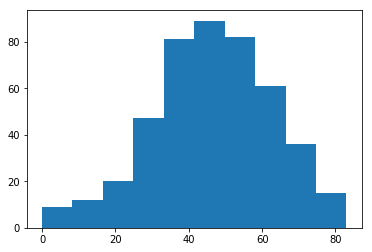

In [24]:
#meaning of first 4 features (features = columns)
feature1 = file[0]
fMean = feature1.mean()
fVar = feature1.var()

plt.hist(feature1)
print("Mean is: " + str(fMean))
print("Var is: " + str(fVar))

Feature 1: Data is numerical, spreads from 0 to ~80. Could be height, weight, income or age (leaning towards age)

Mean is: 0.5508849557522124
Var is: 0.2479593038086458


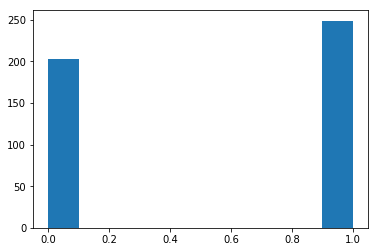

In [25]:
feature2 = file[1]
fMean = feature2.mean()
fVar = feature2.var()

plt.hist(feature2)
print("Mean is: " + str(fMean))
print("Var is: " + str(fVar))

Feature 2: Data is categorical/Boolean. Could be gender, or positive / negative result for some test. 

Mean is: 166.18805309734512
Var is: 1381.6341806800995


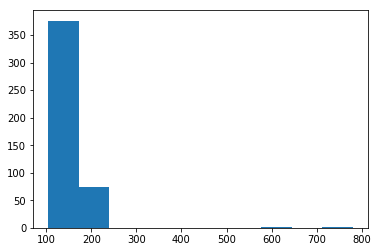

In [26]:
feature3 = file[2]
fMean = feature3.mean()
fVar = feature3.var()

plt.hist(feature3)
print("Mean is: " + str(fMean))
print("Var is: " + str(fVar))

Feature 3: Data is numerical, stays within a set range mostly, with some outliers. Could be height? Weight? Leaning towards blood pressure?

Mean is: 68.17035398230088
Var is: 275.25472892098185


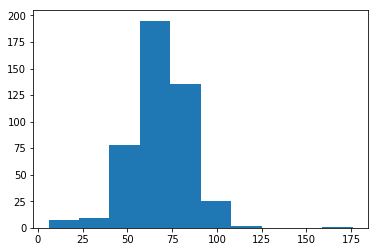

In [27]:
feature4 = file[3]
fMean = feature4.mean()
fVar = feature4.var()

plt.hist(feature4)
print("Mean is: " + str(fMean))
print("Var is: " + str(fVar))

Feature 4: Data is numerical. Could be height? Weight? Amount of Water drank before operation? 


In [28]:
#(c) Are there missing values? Replace them with the average of the corresponding feature column
#user .fillna("thingto replace", inplace=True)
print("Before")
print(file[13])

Before
0        NaN
1        NaN
2       23.0
3        NaN
4        NaN
5        NaN
6        NaN
7        NaN
8       84.0
9        NaN
10       NaN
11       NaN
12       NaN
13       NaN
14       NaN
15       NaN
16       NaN
17       NaN
18       NaN
19       NaN
20       NaN
21       NaN
22       NaN
23       NaN
24       NaN
25       NaN
26       NaN
27       NaN
28       NaN
29     160.0
       ...  
422      NaN
423      NaN
424    103.0
425      NaN
426    -84.0
427      NaN
428      NaN
429      NaN
430    -44.0
431      NaN
432      NaN
433      NaN
434      NaN
435      NaN
436      NaN
437      NaN
438      NaN
439      NaN
440    -90.0
441      NaN
442      NaN
443      NaN
444      NaN
445      NaN
446      NaN
447      NaN
448      NaN
449     84.0
450    103.0
451      NaN
Name: 13, Length: 452, dtype: float64


In [29]:
means = file.mean()
print(len(means))
for i in range(len(file.columns)):
    x = means[i]
#     print(x)
    file[i].fillna(value=x, inplace=True, downcast="infer")
    
print("After")
print(means[13])
print(file[13])

280
After
-13.592105263157896
0      -13.592105
1      -13.592105
2       23.000000
3      -13.592105
4      -13.592105
5      -13.592105
6      -13.592105
7      -13.592105
8       84.000000
9      -13.592105
10     -13.592105
11     -13.592105
12     -13.592105
13     -13.592105
14     -13.592105
15     -13.592105
16     -13.592105
17     -13.592105
18     -13.592105
19     -13.592105
20     -13.592105
21     -13.592105
22     -13.592105
23     -13.592105
24     -13.592105
25     -13.592105
26     -13.592105
27     -13.592105
28     -13.592105
29     160.000000
          ...    
422    -13.592105
423    -13.592105
424    103.000000
425    -13.592105
426    -84.000000
427    -13.592105
428    -13.592105
429    -13.592105
430    -44.000000
431    -13.592105
432    -13.592105
433    -13.592105
434    -13.592105
435    -13.592105
436    -13.592105
437    -13.592105
438    -13.592105
439    -13.592105
440    -90.000000
441    -13.592105
442    -13.592105
443    -13.592105
444    -13.59210

In order to determine which features influence the patient condition, we would have to find which features (columns) have the strongest influence on the result features (final column). In order to do this, we would have to determine the correlation coefficient for each column. 

In [30]:
#find correlation -> user DataFrame.corr()
colLen = len(file.columns)
coeff = []
#go up to second to last col
for i in range(colLen - 2):
#     print(i)
    #correlate it to last col
    corr = abs(file[i].corr(file[colLen-1]))
    if(numpy.isnan(corr)):
        corr = 0
    coeff.append(corr)

In [31]:
top3Idx = numpy.argsort(coeff)
print("Using 0 based indexing (we didn't have headers), the most important columns (least to greatest) are: ")
print(top3Idx[-3:])
print("with correlation coeff")
print(numpy.sort(coeff)[-3:])


Using 0 based indexing (we didn't have headers), the most important columns (least to greatest) are: 
[92  4 90]
with correlation coeff
[0.3139825  0.32387873 0.3688756 ]


Highest correlation coefficient = most important features